# Neural Networks for Handwritten Digits Classification

In [43]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

In [7]:
(X_train, y_train) ,(X_test, y_test)= keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 5s 0us/step


In [8]:
len(X_train)

60000

In [9]:
len(X_test)

10000

In [10]:
X_train[0].shape

(28, 28)

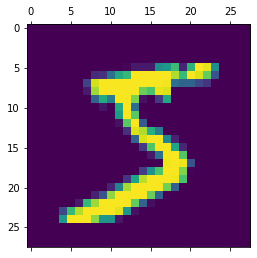

In [11]:
plt.matshow(X_train[0])

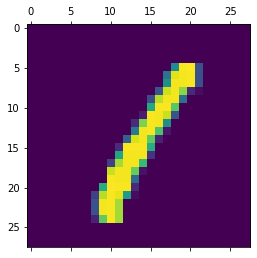

In [12]:
plt.matshow(X_train[3])

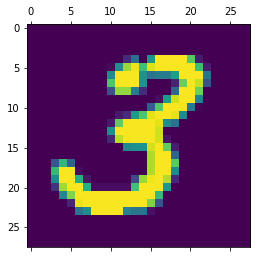

In [13]:
plt.matshow(X_train[255])

In [14]:
y_train[255]

3

In [15]:
y_train[3]

1

In [16]:
 y_train[0:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

In [17]:
 y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

# Flatten Our Training DataSet
Covert 28*28 grid into single dimentional array to have 784 elements

In [26]:
#Scaling 0-255 to 0-1(All values will be from 0-1; it improves the accuracy)
X_train=X_train/255
X_test=X_test/255

In [27]:
X_train_flattened= X_train.reshape(len(X_train), 28*28)
X_test_flattened= X_test.reshape(len(X_test), 28*28)

In [28]:
X_test_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
X_test_flattened.shape

(10000, 784)

In [30]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Create a Simple Neaural Network with 784 elements(input) and 10 elements(output layer)

In [32]:
model= keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
    
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
model.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4911 - accuracy: 0.8769
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3068 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2853 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2749 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2678 - accuracy: 0.9265


# Evaluate Accuracy on Test Data Set

In [33]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2669 - accuracy: 0.9265


[0.2669406235218048, 0.9265000224113464]

In [34]:
model.predict(X_test_flattened)

array([[2.2130127e-05, 1.2116266e-10, 3.5769201e-05, ..., 7.3835766e-01,
        6.0191614e-05, 7.7539682e-04],
       [4.9719214e-04, 7.3196372e-07, 3.7636843e-01, ..., 2.1685335e-16,
        7.0499154e-05, 2.9023488e-13],
       [1.9416550e-06, 4.3853697e-01, 8.5656345e-03, ..., 5.6841969e-04,
        3.2016933e-03, 2.0411611e-04],
       ...,
       [4.0792709e-11, 2.6197268e-11, 1.4607693e-08, ..., 3.1915174e-06,
        1.3781223e-05, 4.3544169e-05],
       [2.4625260e-08, 1.5634596e-08, 3.2927673e-08, ..., 5.6060570e-09,
        4.2116642e-04, 2.0045681e-08],
       [9.8869116e-08, 7.7940113e-16, 1.8262265e-06, ..., 3.6913022e-14,
        2.0342013e-09, 2.3269765e-12]], dtype=float32)

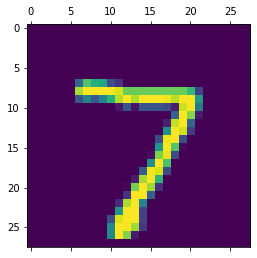

In [35]:
plt.matshow(X_test[0])

In [38]:
y_predicted=model.predict (X_test_flattened)
y_predicted[0]
#array of values (0-9 and the maximum of it will be our number)

array([2.2130127e-05, 1.2116266e-10, 3.5769201e-05, 9.9850893e-03,
       1.1368209e-06, 7.1547918e-05, 1.9037303e-09, 7.3835766e-01,
       6.0191614e-05, 7.7539682e-04], dtype=float32)

In [39]:
#find maximum value and print it's index
np.argmax(y_predicted[0])


7

# Confusion Matrix

In [41]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]



[7, 2, 1, 0, 4]

In [44]:
cm= tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    0,    1,    0,    4,    6,    2,    1,    0],
       [   0, 1106,    4,    2,    0,    1,    4,    2,   16,    0],
       [   7,    8,  928,   15,    9,    4,   13,    8,   37,    3],
       [   4,    0,   17,  928,    1,   20,    3,   10,   21,    6],
       [   1,    1,    2,    1,  928,    0,   11,    3,    9,   26],
       [  10,    1,    2,   42,   12,  762,   19,    5,   34,    5],
       [   9,    3,    3,    1,    7,    7,  924,    2,    2,    0],
       [   1,    6,   24,    9,   11,    0,    0,  941,    3,   33],
       [   8,    6,    7,   22,    9,   21,   10,   11,  874,    6],
       [  11,    7,    1,   12,   38,    5,    0,   20,    7,  908]])>

Text(69.0, 0.5, 'Truth')

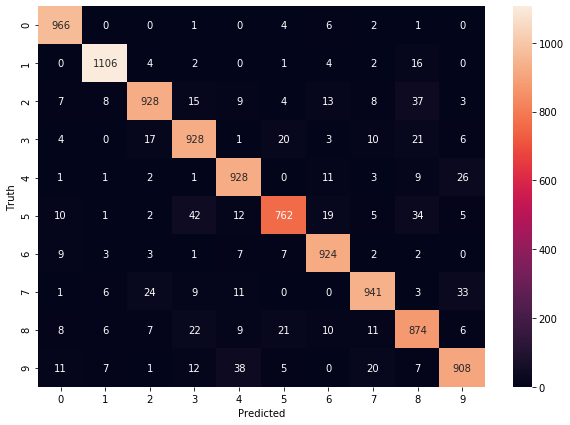

In [47]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#0 is predicted as 0 966 times, 1 is predicted as 1 1106 times....

# Adding a Hidden Layer to our Model as it improves the performance

In [48]:
model= keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    #input neurons are 784, in hidden layer let's assume 100<784,, we can have many hidden layers
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
model.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2938 - accuracy: 0.9175
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1339 - accuracy: 0.9614
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0967 - accuracy: 0.9722
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0769 - accuracy: 0.9762
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0616 - accuracy: 0.9818


In [49]:
model.evaluate(X_test_flattened, y_test) 

313/313 [==============================] - 0s 1ms/step - loss: 0.0798 - accuracy: 0.9747


[0.07982576638460159, 0.9746999740600586]

# Hence accuracy is increased from 92 to 97% 

Text(69.0, 0.5, 'Truth')

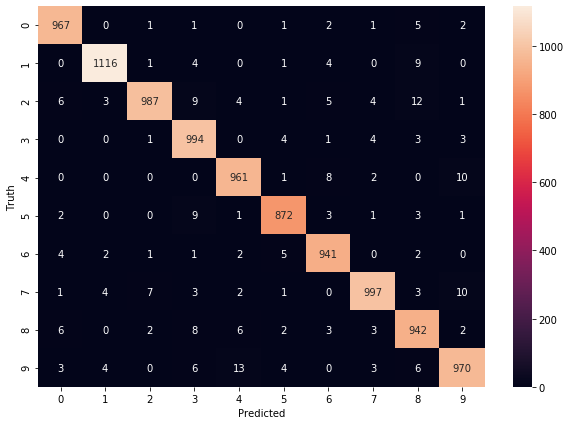

In [52]:
y_predicted=model.predict (X_test_flattened)
y_predicted_labels_layers=[np.argmax(i) for i in y_predicted]
y_predicted_labels_layers[:5]
cm= tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels_layers)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Number of errors in Black Boxes are now decreased and in diagnol boxes it is increased

# Implementing the Model without Flattened Array

In [53]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2952 - accuracy: 0.9176
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1395 - accuracy: 0.9597
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0996 - accuracy: 0.9704
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0770 - accuracy: 0.9767
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0622 - accuracy: 0.9807
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0528 - accuracy: 0.9844
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0441 - accuracy: 0.9865
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0365 - accuracy: 0.9887
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0312 - accuracy: 0.9903
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.025

Hence Accuracy is 99%